<a href="https://colab.research.google.com/github/simulate111/MNIST/blob/main/MNIST_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mnist database

In [1]:
!pip install --upgrade pip
!pip show tensorflow-datasets protobuf tensorflow-metadata
!pip uninstall protobuf
!pip install protobuf==3.20.3
!pip install --upgrade tensorflow-datasets
!pip show tensorflow-datasets protobuf tensorflow-metadata
!pip install pydot
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Name: protobuf
Version: 3.19.6
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: 3-Clause BSD License
Location: /shared-libs/python3.9/py/lib/python3.9/site-packages
Requires: 
Required-by: google-api-core, google-cloud-bigquery, google-cloud-bigquery-storage, google-cloud-spanner, googleapis-common-protos, grpc-google-iam-v1, grpcio-status, proto-plus, tensorboard, tensorflow
Found existing installation: protobuf 3.19.6
Not uninstalling protobuf at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
Can't uninstall 'protobuf'. No files were found to uninstall.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: protobu

In [2]:
#LIbraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import save_model, load_model

2024-02-21 00:06:31.807316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 00:06:31.930805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-21 00:06:31.930842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-21 00:06:31.952835: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 00:06:32.731585: W tensorflow/stream_executor/platform/de

### 1. Load the MNSIT data set and split into training and test sets.

In [3]:
(ds_train1, ds_test1)= tfds.load('mnist', split=['train', 'test'], as_supervised=True)
print("Training size:", len(ds_train1))
print("Test size:", len(ds_test1))

2024-02-21 00:06:34.773289: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".
Dl Completed...: 100%|██████████| 5/5 [00:00<00:00,  9.93 file/s]
2024-02-21 00:06:35.922586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-21 00:06:35.922624: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-21 00:06:35.922645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to

2024-02-21 00:06:36.316970: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


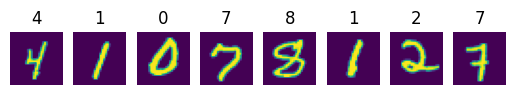

In [4]:
# Display some images. Specify how many images you want to see.
NumberOfImages = 8
fig, axes = plt.subplots(1, NumberOfImages)
for ax, (image, label) in zip(axes, ds_train1.take(NumberOfImages)):
    ax.imshow(image[:, :, 0])
    ax.set_title(label.numpy())
    ax.axis('off')

In [5]:
#Data normalization
ds_train = ds_train1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)
ds_test = ds_test1.map(lambda image, label: (tf.cast(image, tf.float32) / 255., label)).batch(64)

### 2. Build a CNN with at least one convolutional layer and 2 or more hidden layers and a dense output layer for 10 classes.

In [6]:
modelCNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(), layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,189,930
Trainable params: 1,189,930
Non-trainable params: 0
_________________________________________________________________




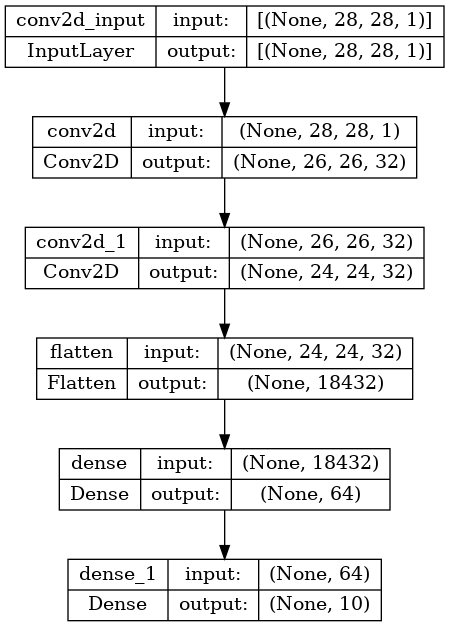

In [7]:
modelCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelCNN.summary()
print('\n')
plot_model(modelCNN, show_shapes=True)

### 3. Train your CNN on the MNIST training set (extracted in step 1).

In [8]:
NumberOfEpochs=2

In [9]:
historyCNN = modelCNN.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)

Epoch 1/2
938/938 [==============================] - 109s 116ms/step - loss: 0.1392 - accuracy: 0.9572 - val_loss: 0.0604 - val_accuracy: 0.9801
Epoch 2/2
938/938 [==============================] - 113s 120ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0595 - val_accuracy: 0.9792


In [21]:
modelCNN.save('modelCNN.h5')

### 4. Evaluate your trained model using the test data set. What is the accuracy of your model?

In [22]:
test_loss, test_accuracy = modelCNN.evaluate(ds_test)
print("Accuracy:", round(test_accuracy, 2), 'or', test_accuracy)

157/157 [==============================] - 4s 27ms/step - loss: 0.0595 - accuracy: 0.9792
Accuracy: 0.98 or 0.979200005531311


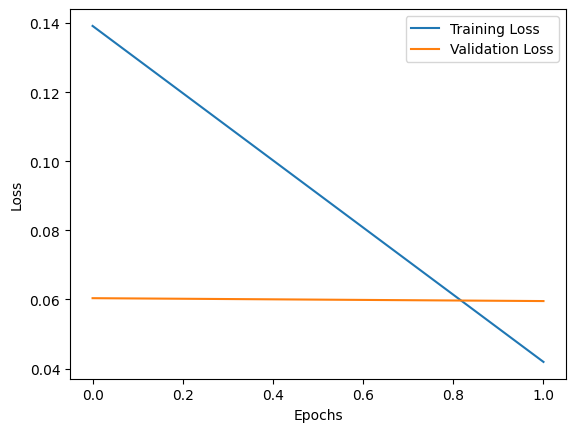

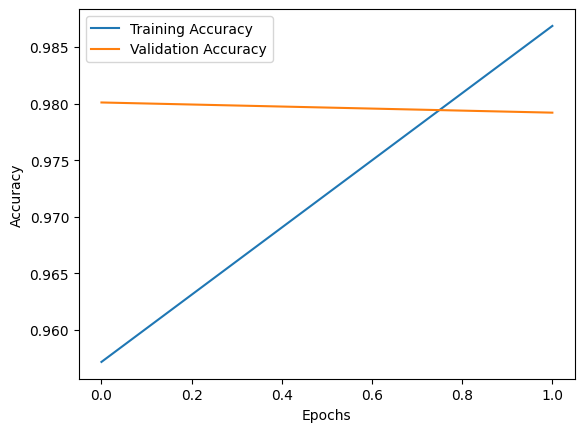

In [23]:
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(historyCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### 5. Do the following experiments to improve accuracy:
- increase the size and depth of the inner layers, what is the effect on the model accuracy?

In [ ]:
results_dfSD = pd.DataFrame(columns=['Hidden Layers', 'Filter Size', 'Test Accuracy'])
layersSD = [3, 4]
filtersSD = [(3, 3), (5, 5)]

for layerSD in layersSD:
    for filter_size in filtersSD:
        modelSD = models.Sequential([layers.Conv2D(32, filter_size, activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, filter_size, activation='relu'), layers.Flatten()])

        # Add hidden layer
        for _ in range(layerSD):
            modelSD.add(layers.Dense(128, activation='relu'))

        modelSD.add(layers.Dense(10, activation='softmax'))
        modelSD.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(f"\nModel with {layerSD} hidden layers and filter size {filter_size}:")
        historySD = modelSD.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test, verbose=1)
        test_lossSD, test_accuracySD = modelSD.evaluate(ds_test)
        print(f'Test Loss: {test_lossSD}, Test Accuracy: {test_accuracySD}')

        dataSD = {'Hidden Layers': layerSD, 'Filter Size': filter_size, 'Test Accuracy': test_accuracySD}
        results_dfSD = pd.concat([results_dfSD, pd.DataFrame([dataSD])], ignore_index=True)

        # Save the model
        model_filename = f'model_layer_{layerSD}_filter_{filter_size}.h5'
        modelSD.save(model_filename)
        print(f'Model saved as: {model_filename}'

Model with 3 hidden layers and filter size (3, 3):
Epoch 1/2
938/938 [==============================] - 117s 124ms/step - loss: 0.1530 - accuracy: 0.9528 - val_loss: 0.0531 - val_accuracy: 0.9823
Epoch 2/2
157/157 [==============================] - 5s 31ms/step - loss: 0.0506 - accuracy: 0.9834
Test Loss: 0.05057469755411148, Test Accuracy: 0.9833999872207642
Model with 3 hidden layers and filter size (5, 5):
Epoch 1/2
/tmp/ipykernel_77/1025760929.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_dfSD = pd.concat([results_dfSD, pd.DataFrame([dataSD])], ignore_index=True)
938/938 [==============================] - 177s 188ms/step - loss: 0.1376 - accuracy: 0.9576 - val_loss: 0.0512 - val_accuracy: 0.9839
Epoch 2/2
157/157 [=======

In [ ]:
print(results_dfSD)

  Hidden Layers Filter Size  Test Accuracy
0             3      (3, 3)         0.9834
1             3      (5, 5)         0.9861
2             4      (3, 3)         0.9838
3             4      (5, 5)         0.9844


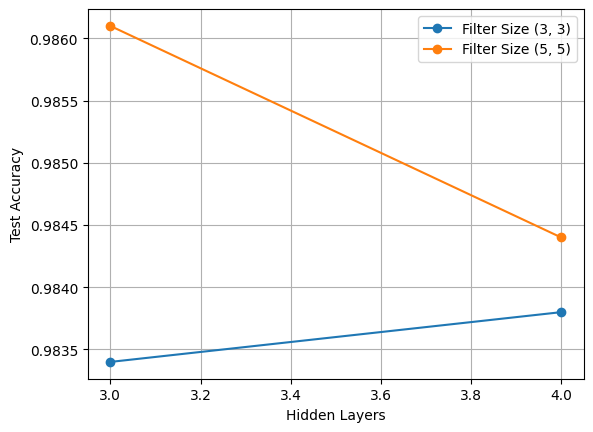

In [ ]:
for filter_size, group_df in results_dfSD.groupby('Filter Size'):
    label = f"Filter Size {filter_size}"
    plt.plot(group_df['Hidden Layers'], group_df['Test Accuracy'], label=label, marker='o', linestyle='-')

plt.xlabel('Hidden Layers')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)

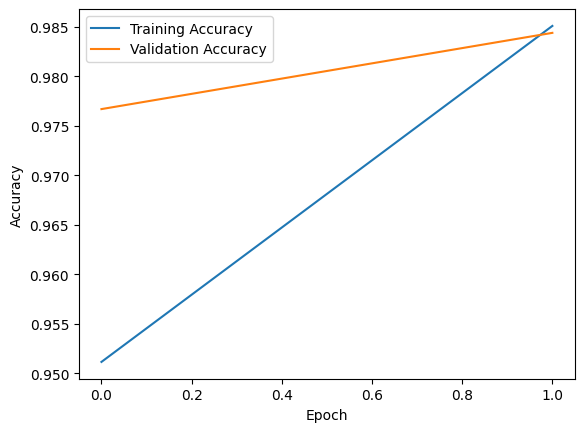

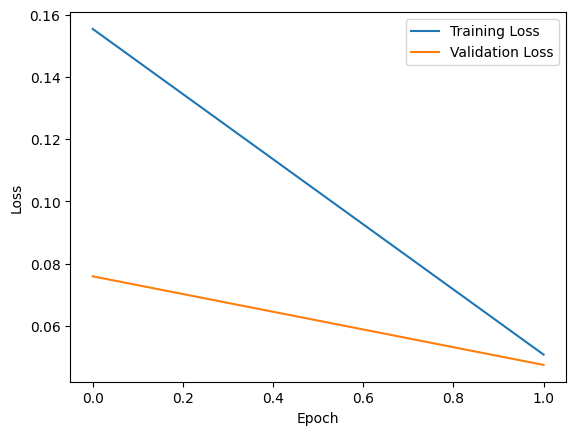

In [ ]:
plt.plot(historySD.history['accuracy'], label='Training Accuracy')
plt.plot(historySD.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(historySD.history['loss'], label='Training Loss')
plt.plot(historySD.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

- experiment with different activation functions in the inner layers (relu, sigmoid, softmask, etc), see the list of keras activation functions at https://keras.io/api/layers/activations/

In [ ]:
results_dfA = pd.DataFrame(columns=['Activation Function', 'Test Accuracy'])
activations = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for activation in activations:
    print(f"\nActivation function: {activation}")

    modelA = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
        layers.Activation(activation), layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation(activation), layers.Flatten(),
        layers.Dense(64, activation=activation), layers.Dense(10, activation='softmax')])

    modelA.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    historyA = modelA.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
    test_lossA, test_accuracyA = modelA.evaluate(ds_test)
    print(f'Test Loss: {test_lossA}, Test Accuracy: {test_accuracyA}')

    dataA = {'Activation Function': activation, 'Test Accuracy': test_accuracyA}
    results_dfA = pd.concat([results_dfA, pd.DataFrame([dataA])], ignore_index=True)

    # Save the model
    model_filename = f'model_activation_{activation}.h5'
    modelA.save(model_filename)
    print(f'Model saved as: {model_filename}')


Activation function: relu
Epoch 1/2
938/938 [==============================] - 107s 114ms/step - loss: 0.1429 - accuracy: 0.9570 - val_loss: 0.0546 - val_accuracy: 0.9823
Epoch 2/2
157/157 [==============================] - 4s 28ms/step - loss: 0.0510 - accuracy: 0.9836
Test Loss: 0.05097974091768265, Test Accuracy: 0.9836000204086304

Activation function: sigmoid
Epoch 1/2
/tmp/ipykernel_77/2653534319.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_dfA = pd.concat([results_dfA, pd.DataFrame([dataA])], ignore_index=True)
938/938 [==============================] - 109s 116ms/step - loss: 2.3210 - accuracy: 0.1088 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/2
157/157 [==============================] - 5s 31ms/step - loss: 

In [ ]:
print(results_dfA)

  Activation Function  Test Accuracy
0                relu         0.9836
1             sigmoid         0.1135
2             softmax         0.1135
3                tanh         0.9587
4            softplus         0.9584
5          leaky_relu         0.9831


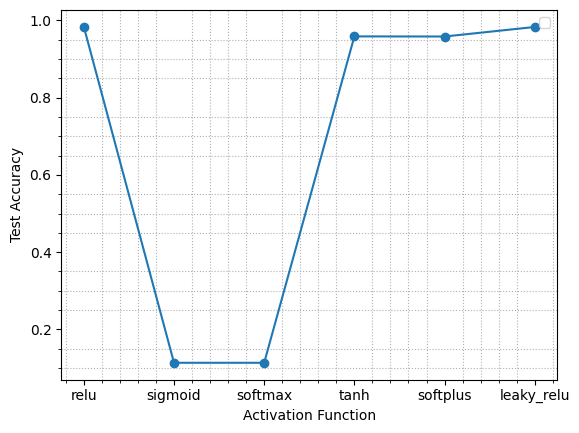

In [ ]:
plt.plot(results_dfA['Activation Function'], results_dfA['Test Accuracy'], marker='o', linestyle='-')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.legend()
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':') 

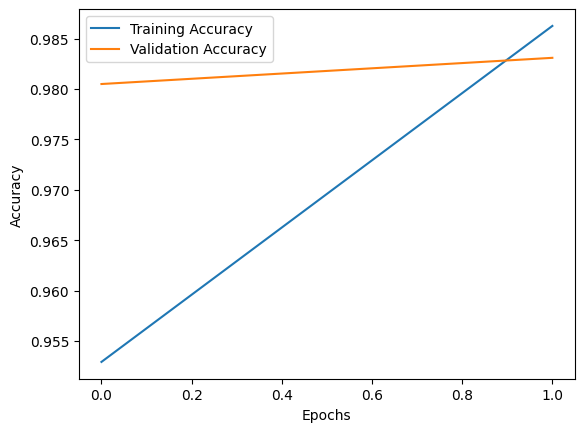

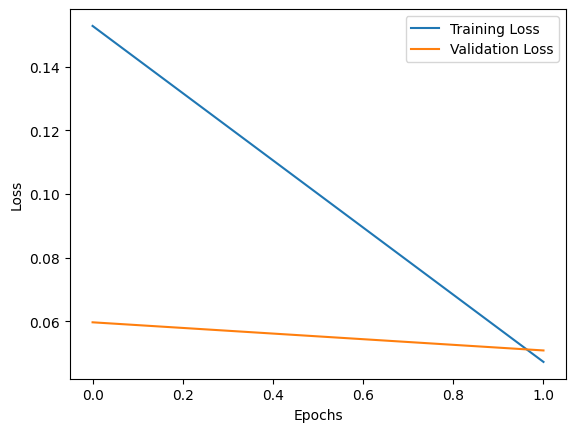

In [ ]:
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?

In [ ]:
#We remove sigmoid and softmax as their accuracies was not acceptible.
#tanh and softplus are also excluded as they have lower accuracies than other two activation methods.
results_dfAC = pd.DataFrame(columns=['Activation Function', 'Network Size', 'Test Accuracy'])
activationsAC = ['relu', 'leaky_relu']
sizesAC = [32, 128]
depthsAC = [1, 3] 

for activation in activationsAC:
    for size in sizesAC:
        for depth in depthsAC:
            print(f"\nActivation function: {activation}, Size: {size}, Depth: {depth}")

            layers_list = [
                layers.Conv2D(size, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                layers.Activation(activation)]

            for _ in range(depth - 1):  
                layers_list.extend([
                    layers.Conv2D(size, kernel_size=(3, 3)), layers.Activation(activation)])

            layers_list.extend([
                layers.Flatten(), layers.Dense(size * 2, activation=activation),  
                layers.Dense(10, activation='softmax')])

            modelAC = models.Sequential(layers_list)
            modelAC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            historyAC = modelAC.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
            test_loss, test_accuracy = modelAC.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
            dataAC = {'Activation Function': activation, 'Network Size': size, 'Test Accuracy': test_accuracy}
            results_dfAC = pd.concat([results_dfAC, pd.DataFrame([dataAC])], ignore_index=True)

            # Save the model
            model_filename = f'model_activation_{activation}_size_{size}_depth_{depth}.h5'
            modelAC.save(model_filename)
            print(f'Model saved as: {model_filename}')


Activation function: relu, Size: 32, Depth: 1
Epoch 1/2
938/938 [==============================] - 40s 42ms/step - loss: 0.1677 - accuracy: 0.9491 - val_loss: 0.0662 - val_accuracy: 0.9790
Epoch 2/2
157/157 [==============================] - 2s 12ms/step - loss: 0.0581 - accuracy: 0.9802
Test Loss: 0.058094292879104614, Test Accuracy: 0.9801999926567078

Activation function: relu, Size: 32, Depth: 3
Epoch 1/2
/tmp/ipykernel_40/3247206663.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_dfAC = pd.concat([results_dfAC, pd.DataFrame([dataAC])], ignore_index=True)
938/938 [==============================] - 171s 182ms/step - loss: 0.1336 - accuracy: 0.9593 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 2/2
157/157 [================

KeyboardInterrupt: 

In [ ]:
print(results_dfAC)

NameError: name 'results_dfAC' is not defined

In [ ]:
plt.plot(historyAC.history['accuracy'], label='Training Accuracy')
plt.plot(historyAC.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyAC.history['loss'], label='Training Loss')
plt.plot(historyAC.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The choice of activation functions can significantly impact the performance of your neural network. Let's analyze the results you've obtained with different activation functions:

Sigmoid Activation:

Training Accuracy: ~10%
Test Accuracy: ~10%
Sigmoid might not be suitable for deeper networks or convolutional layers due to the vanishing gradient problem.
Softmax Activation:

Training Accuracy: ~21%
Test Accuracy: ~21%
Using softmax in the hidden layers might not be suitable as it tends to squash input values, and using it in convolutional layers is not common.
Softplus Activation:

Training Accuracy: ~11%
Test Accuracy: ~11%
Softplus might not be well-suited for convolutional layers in this context.
Tanh Activation:

Training Accuracy: ~95%
Test Accuracy: ~96%
Tanh performs well in this context, capturing a good representation of the data.
In summary, for convolutional layers in image classification tasks, commonly used activation functions like ReLU or variants (e.g., Leaky ReLU) are preferred. Sigmoid, Softmax, and Softplus activations are generally not suitable for hidden layers in convolutional neural networks (CNNs). Tanh can be a good choice, but ReLU is often preferred due to its simplicity and effectiveness.

You may want to experiment further with ReLU or Leaky ReLU activations for the convolutional and dense layers.

- experiment with various optimizers (https://keras.io/api/optimizers/) and learning rate. What is the effect on the resulting model accuracy?

In [ ]:
results_dfO = pd.DataFrame(columns=['Optimizer', 'Learning Rate', 'Test Accuracy'])
optimizers_to_try = ['adam', 'sgd', 'rmsprop', 'adagrad']  # Add more optimizers if needed
learning_ratesO = [0.01, 0.1]
activationsO = ['relu', 'leaky_relu']

for optimizer in optimizers_to_try:
    for learning_rate in learning_ratesO:
        for activation in activationsO:
            print(f"\nTraining with optimizer: {optimizer}, Learning Rate: {learning_rate}, Activation: {activation}")

            modelO = models.Sequential([
                layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                layers.Activation(activation),
                layers.Conv2D(32, kernel_size=(3, 3)),
                layers.Activation(activation), layers.Flatten(),
                layers.Dense(64, activation=activation),
                layers.Dense(10, activation='softmax')])

            # Compile the model with the specified optimizer and learning rate
            optimizer_config = getattr(tf.keras.optimizers, optimizer)(learning_rate=learning_rate)
            modelO.compile(optimizer=optimizer_config,
                          loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            historyO = modelO.fit(ds_train, epochs=NumberOfEpochs, validation_data=ds_test)
            test_loss, test_accuracy = modelO.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
            dataO = {'Optimizer': optimizer, 'Learning Rate': learning_rate, 'Test Accuracy': test_accuracy}
            results_dfO = pd.concat([results_dfO, pd.DataFrame([dataO])], ignore_index=True)

            # Save the model
            model_filename = f'model_optimizer_{optimizer}_lr_{learning_rate}_activation_{activation}.h5'
            modelO.save(model_filename)
            print(f'Model saved as: {model_filename}')

In [ ]:
print(results_df)

In [ ]:
plt.plot(historyO.history['accuracy'], label='Training Accuracy')
plt.plot(historyO.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyO.history['loss'], label='Training Loss')
plt.plot(historyO.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- with all the above variations, experiment with various batch sizes and epochs for training (see https://keras.io/api/models/model_training_apis/)

In [ ]:
results_dfBE = pd.DataFrame(columns=['Batch Size', 'Epochs', 'Test Accuracy'])
batch_sizes = [16, 64]
epochs_list = [2, 5]

for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\nTraining with batch size {batch_size} and epochs {epochs}")

        modelBE = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')])

        modelBE.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        historyBE = modelBE.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)
        test_loss, test_accuracy = modelBE.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        dataBE = {'Batch Size': batch_size, 'Epochs': epochs, 'Test Accuracy': test_accuracy}
        results_dfBE = pd.concat([results_dfBE, pd.DataFrame([dataBE])], ignore_index=True)

        # Save the model
        model_filename = f'model_batchsize_{batch_size}_epochs_{epochs}.h5'
        modelBE.save(model_filename)
        print(f'Model saved as: {model_filename}')

In [ ]:
print(results_dfBE)

In [ ]:
plt.plot(historyBE.history['accuracy'], label='Training Accuracy')
plt.plot(historyBE.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyBE.history['loss'], label='Training Loss')
plt.plot(historyBE.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- what happens if we don't use any CNN layer? (considering the model in https://www.tensorflow.org/datasets/keras_example).

In [ ]:
results_dfNoCNN = pd.DataFrame(columns=['Dense Layer Size', 'Batch Size', 'Epochs', 'Test Accuracy'])
modelNoCNN = models.Sequential([layers.Flatten(input_shape=(28, 28, 1)),
                                layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])

dense_sizes = [64, 128]
for dense_size in dense_sizes:
    modelNoCNN.layers[1].units = dense_size
    modelNoCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    for batch_size in [32, 64]:
        for epochs in [2, 4]:
            print(f"\n\nTraining with Dense Layer Size: {dense_size}, Batch Size: {batch_size}, Epochs: {epochs}")
            historyNoCNN = modelNoCNN.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)
            test_loss, test_accuracy = modelNoCNN.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            dataNoCNN = {'Dense Layer Size': dense_size, 'Batch Size': batch_size, 'Epochs': epochs,
                         'Test Accuracy': test_accuracy}
            results_dfNoCNN = pd.concat([results_dfNoCNN, pd.DataFrame([dataNoCNN])], ignore_index=True)

            # Save the model
            model_filename = f'model_NoCNN_dense_{dense_size}_batchsize_{batch_size}_epochs_{epochs}.h5'
            modelNoCNN.save(model_filename)
            print(f'Model saved as: {model_filename}')

In [ ]:
print(results_dfNoCNN)

In [ ]:
plt.plot(historyNoCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyNoCNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(historyNoCNN.history['loss'], label='Training Loss')
plt.plot(historyNoCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

If you don't use any CNN layers and rely solely on dense layers for image classification tasks, your model might struggle to capture spatial hierarchies and local patterns present in images. CNNs are specifically designed to handle grid-like data, like images, by using convolutional and pooling layers to learn hierarchical features.

Without CNN layers, the model might treat each pixel as an independent feature, not considering the spatial relationships between pixels. This can result in a significantly larger number of parameters, making the training process slower and more prone to overfitting. Additionally, the model might not generalize well to new, unseen images.

In summary, while a model without CNN layers might work for simple tasks or datasets, it's generally less effective for image-related tasks compared to models that leverage convolutional layers.

In [ ]:

# Plot accuracies
plt.figure(figsize=(12, 8))

# Plot training accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy {label}')

# Plot validation accuracies
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.show()

# Plot losses
plt.figure(figsize=(12, 8))

# Plot training losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['loss'], label=f'Training Loss {label}')

# Plot validation losses
for history, label in zip([historySD, historyA, historyAC, historyBE, historyO, historyNoCNN],
                          ['SD', 'A', 'AC', 'BE', 'O', 'NoCNN']):
    plt.plot(history.history['val_loss'], label=f'Validation Loss {label}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()


### 6. Write a report on your observations on how the model performed with various experiments in step 5 and submit it along with the colab file.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54a21652-0e9b-45ff-a672-e40722b5b96c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>